In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5944 - accuracy: 0.0097 - val_loss: 1.2542 - val_accuracy: 0.0107
Epoch 2/50
50000/50000 [==============================] - 21s 419us/step - loss: 1.1488 - accuracy: 0.0108 - val_loss: 1.0780 - val_accuracy: 0.0111
Epoch 3/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.0047 - accuracy: 0.0111 - val_loss: 0.9189 - val_accuracy: 0.0113
Epoch 4/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.8715 - accuracy: 0.0113 - val_loss: 0.8213 - val_accuracy: 0.0115
Epoch 5/50
50000/50000 [==============================] - 19s 377us/step - loss: 0.7740 - accuracy: 0.0115 - val_loss: 0.7510 - val_accuracy: 0.0116
Epoch 6/50
50000/50000 [==============================] - 21s 411us/step - loss: 0.7311 - accuracy: 0.0115 - val_loss: 0.7213 - val_accuracy: 0.0116
Epoch 7/50
50000/50000 [==============================] 

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RTAB.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
63,3,cat,0.0,0.0,0.0,0.400074,0.0,0.0,2.832510,0.0,...,0.0,2.171168,0.0,0.348829,1.659720,1.526370,0.000000,0.0,1.000000,0.000000
1065,3,cat,0.0,0.0,0.0,0.523742,0.0,0.0,3.124959,0.0,...,0.0,2.466287,0.0,0.495929,2.224175,1.448307,0.000000,0.0,0.995796,0.004204
915,1,automobile,0.0,0.0,0.0,0.670696,0.0,0.0,2.818173,0.0,...,0.0,2.179461,0.0,0.109159,1.710640,1.765391,0.000000,0.0,0.995475,0.004525
3368,9,truck,0.0,0.0,0.0,0.415896,0.0,0.0,2.716424,0.0,...,0.0,2.334262,0.0,0.163740,2.038811,1.865715,0.000000,0.0,0.994682,0.005318
5452,0,airplane,0.0,0.0,0.0,0.706337,0.0,0.0,3.216604,0.0,...,0.0,2.383508,0.0,0.377802,2.470163,1.892899,0.000000,0.0,0.993879,0.006121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,7,horse,0.0,0.0,0.0,0.064680,0.0,0.0,0.079762,0.0,...,0.0,0.154912,0.0,0.000000,0.652798,0.522024,0.000000,0.0,0.633952,0.366048
8244,4,deer,0.0,0.0,0.0,0.080752,0.0,0.0,0.054276,0.0,...,0.0,0.000000,0.0,0.000000,0.170809,0.603873,0.000000,0.0,0.632982,0.367018
6234,7,horse,0.0,0.0,0.0,0.194341,0.0,0.0,0.000000,0.0,...,0.0,0.496073,0.0,0.000000,0.425228,0.161849,0.243538,0.0,0.631993,0.368007
9765,4,deer,0.0,0.0,0.0,0.000000,0.0,0.0,0.114408,0.0,...,0.0,0.000000,0.0,0.000000,0.143305,0.710894,0.000000,0.0,0.630414,0.369586


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

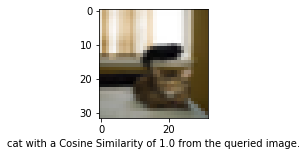

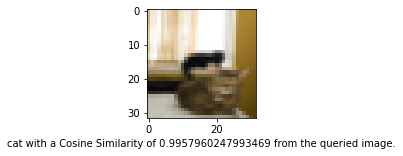

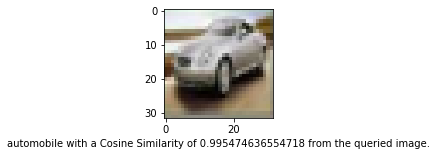

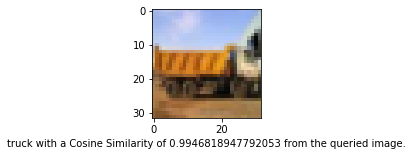

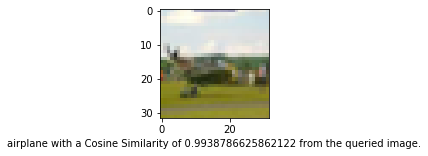

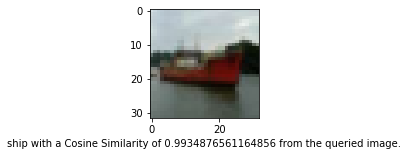

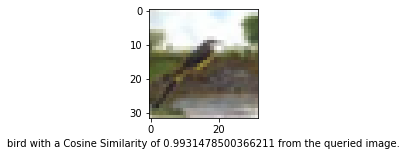

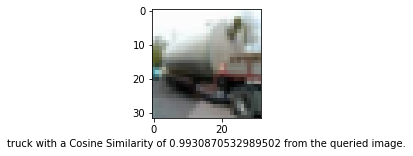

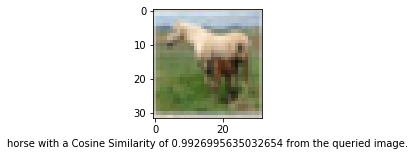

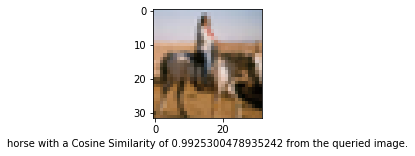

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
63,3,cat,0.0,0.0,0.0,0.400074,0.0,0.0,2.832510,0.0,...,2.171168,0.0,0.348829,1.659720,1.526370,0.0,0.0,1.000000,0.000000,0.000000
404,8,ship,0.0,0.0,0.0,0.425095,0.0,0.0,2.556239,0.0,...,2.102772,0.0,0.373858,1.199021,1.783049,0.0,0.0,0.993488,0.006512,0.731120
8685,7,horse,0.0,0.0,0.0,0.796050,0.0,0.0,2.776552,0.0,...,1.705542,0.0,0.168106,1.644682,1.602522,0.0,0.0,0.992530,0.007470,0.760957
3368,9,truck,0.0,0.0,0.0,0.415896,0.0,0.0,2.716424,0.0,...,2.334262,0.0,0.163740,2.038811,1.865715,0.0,0.0,0.994682,0.005318,0.784453
915,1,automobile,0.0,0.0,0.0,0.670696,0.0,0.0,2.818173,0.0,...,2.179461,0.0,0.109159,1.710640,1.765391,0.0,0.0,0.995475,0.004525,0.800418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,2,bird,0.0,0.0,0.0,1.100507,0.0,0.0,4.249801,0.0,...,3.608735,0.0,0.000000,2.501458,5.023195,0.0,0.0,0.938442,0.061558,6.162844
9848,2,bird,0.0,0.0,0.0,1.372187,0.0,0.0,4.824312,0.0,...,3.024476,0.0,0.000000,2.253529,5.296646,0.0,0.0,0.933760,0.066240,6.231340
9921,0,airplane,0.0,0.0,0.0,1.586623,0.0,0.0,4.981735,0.0,...,2.906155,0.0,0.000000,2.197784,4.971117,0.0,0.0,0.939396,0.060604,6.310618
6222,0,airplane,0.0,0.0,0.0,0.000000,0.0,0.0,1.363418,0.0,...,3.870198,0.0,0.000000,1.272058,5.830896,0.0,0.0,0.774465,0.225535,6.430324


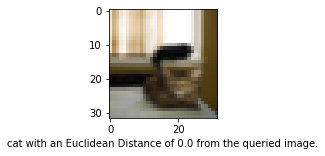

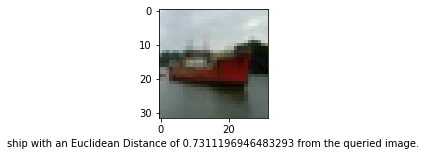

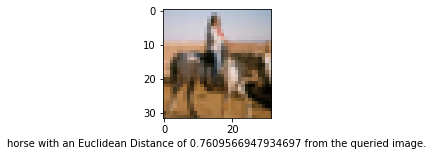

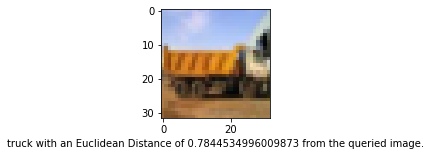

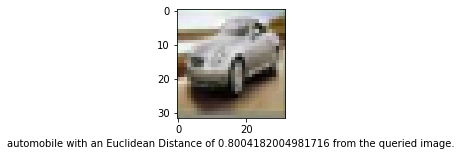

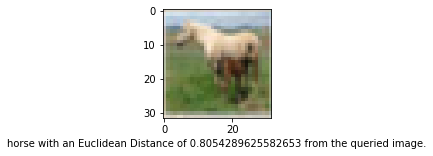

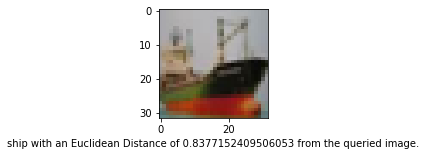

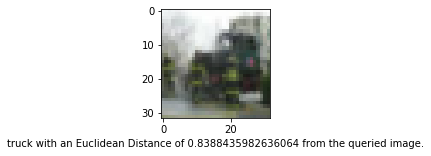

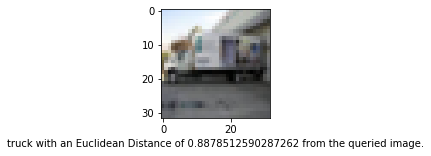

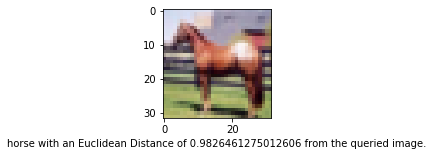

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()